# Task 1


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [14]:
df=pd.read_csv('DS2_C6_S5_Insurance_Data_Challenge.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
df.sex=df.sex.astype('category')
df.smoker=df.smoker.astype('category')
df.region=df.region.astype('category')

In [16]:
label_encoder = preprocessing.LabelEncoder()
df.sex=label_encoder.fit_transform(df.sex)
df.smoker=label_encoder.fit_transform(df.smoker)
df.region=label_encoder.fit_transform(df.region)



In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [18]:
df1=df.copy()

In [19]:
scaler=StandardScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(df1.to_numpy()),columns=df1.columns)


In [20]:
scaled_df # for pca 

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915,-0.220551
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326,-0.914002
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495,-0.961596
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905,-0.930362


In [21]:
df1.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [22]:
df2=df.copy()

In [23]:
df2['charges_bin']=0

In [24]:
df2['charges_bin'].loc[df2['charges']<=4740.287150]=0
df2['charges_bin'].loc[df2['charges']>9382.0330]=1
df2['charges_bin'].loc[df2['charges']>16639.912]=2


In [25]:
un=df2.copy()

In [26]:
un.drop(columns=['charges_bin'],axis=1,inplace=True)
un.drop(columns=['charges'],axis=1,inplace=True)

In [27]:
scaler=StandardScaler()
scaled_df_lda=pd.DataFrame(scaler.fit_transform(un.to_numpy()),columns=un.columns)


In [28]:
scaled_df_lda['charges_bin']=df2.charges_bin

In [29]:
scaled_df_lda # lda

,age,sex,bmi,children,smoker,region,charges_bin
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,2
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,0
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,0
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,2
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,0
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915,1
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326,0
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495,0
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905,0


# Task 2


In [37]:
d=pd.read_csv('DS2_C6_S5_Insurance_Data_Challenge.csv')

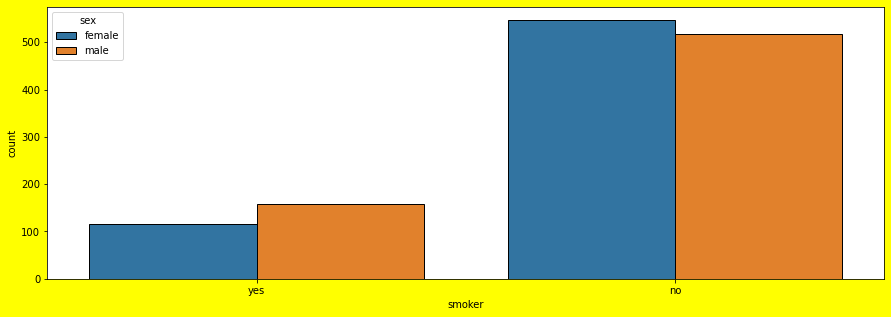

In [38]:

plt.figure(figsize=(15,5),facecolor='yellow')
sns.countplot(data=d,x=d['smoker'],ec='black',hue=d['sex']);

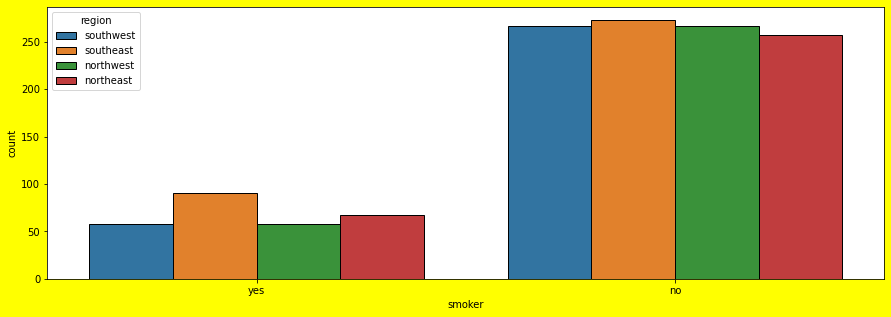

In [39]:

plt.figure(figsize=(15,5),facecolor='yellow')
sns.countplot(data=d,x=d['smoker'],ec='black',hue=d['region']);

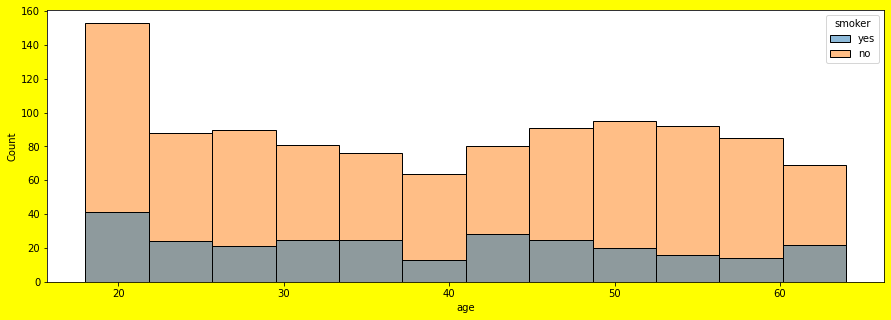

In [40]:
plt.figure(figsize=(15,5),facecolor='yellow')
sns.histplot(data=d,x=d['age'],hue=d['smoker']);

# Maximum smokers and non-smokers are around 20 years of age.

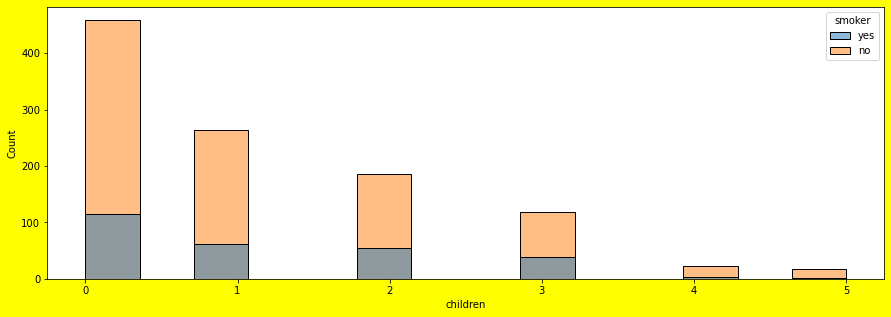

In [41]:
plt.figure(figsize=(15,5),facecolor='yellow')
sns.histplot(data=d,x=d['children'],hue=d['smoker']);

# WE can see that people with 0 children have more smoker count.

<AxesSubplot:title={'center':'SMOKER-CHARGES DISTRIBUTION'}, xlabel='smoker', ylabel='charges'>

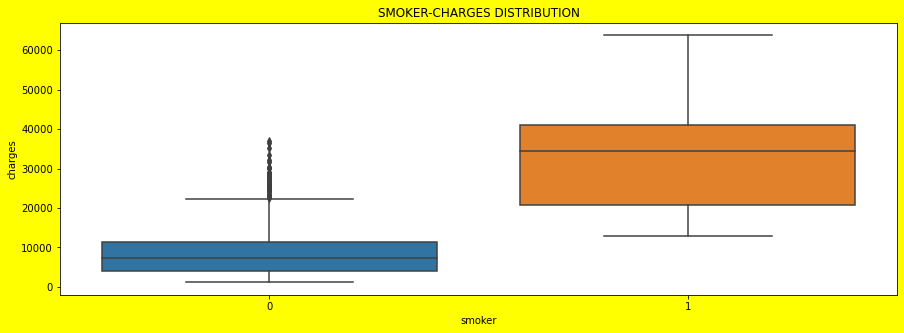

In [119]:
plt.figure(figsize=(15,5),facecolor='yellow')
plt.title('SMOKER-CHARGES DISTRIBUTION')
sns.boxplot(y=df['charges'],x=df['smoker'])

# b. How does obesity exist among smokers and non-smokers policyholders?


<AxesSubplot:xlabel='smoker', ylabel='bmi'>

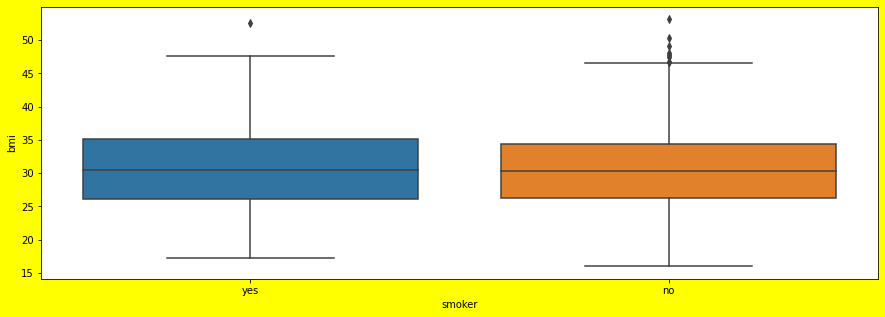

In [42]:
plt.figure(figsize=(15,5),facecolor='yellow')
sns.boxplot(y=d['bmi'],x=d['smoker'])

# C. How do charges are distributed among regions?


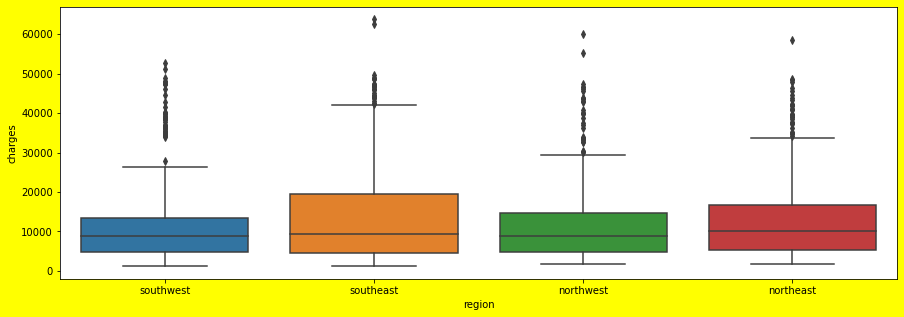

In [43]:

plt.figure(figsize=(15,5),facecolor='yellow')
sns.boxplot(y=df['charges'],x=d['region']);

# d.How do charges are distributed among genders?


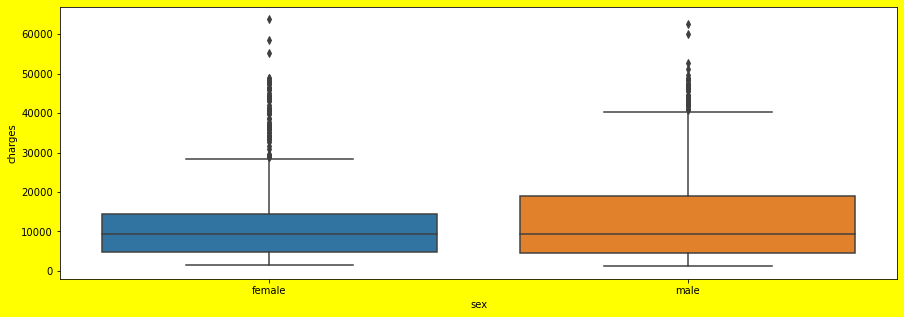

In [44]:

plt.figure(figsize=(15,5),facecolor='yellow')
sns.boxplot(y=d['charges'],x=d['sex']);

# Task 3


In [45]:
from sklearn.decomposition import PCA
#FOR PCA
pca = PCA(n_components=2)
df_r=pca.fit(scaled_df).transform(scaled_df)
explained_variance = pca.explained_variance_ratio_
explained_variance      

array([0.26908318, 0.16899834])

In [46]:
scaled_df_lda.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges_bin'], dtype='object')

In [47]:
x=scaled_df_lda[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=scaled_df_lda.charges_bin

In [48]:
# lda algorithm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)  #no. of classes-1
x_r2=lda.fit(x,y).transform(x)
explained_variance = lda.explained_variance_ratio_
explained_variance 

array([0.78914062, 0.21085938])

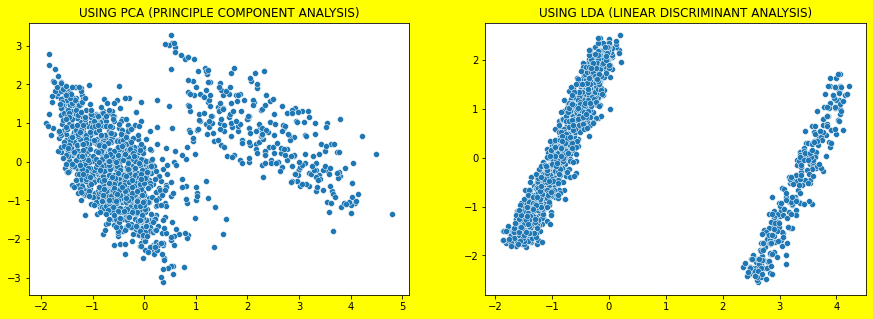

In [49]:
plt.figure(figsize=(15,5),facecolor='yellow')

plt.subplot(121)
sns.scatterplot(df_r[:,0],df_r[:,1])
plt.title('USING PCA (PRINCIPLE COMPONENT ANALYSIS)')

plt.subplot(122)
sns.scatterplot(x_r2[:,0],x_r2[:,1])
plt.title('USING LDA (LINEAR DISCRIMINANT ANALYSIS)')
plt.show()

# Task 4


In [ ]:
# k mean

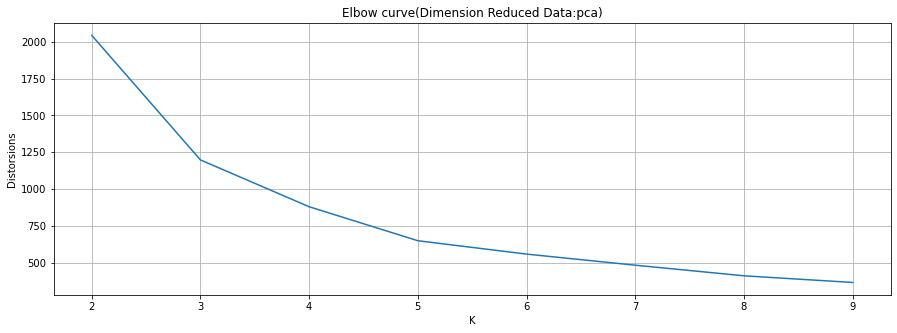

In [53]:
from sklearn.cluster import KMeans
distorsions = []  # WCSS
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_r)
    distorsions.append(kmeans.inertia_) # KMEANS.INERTIA_ GIVES WCSS

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve(Dimension Reduced Data:pca)');

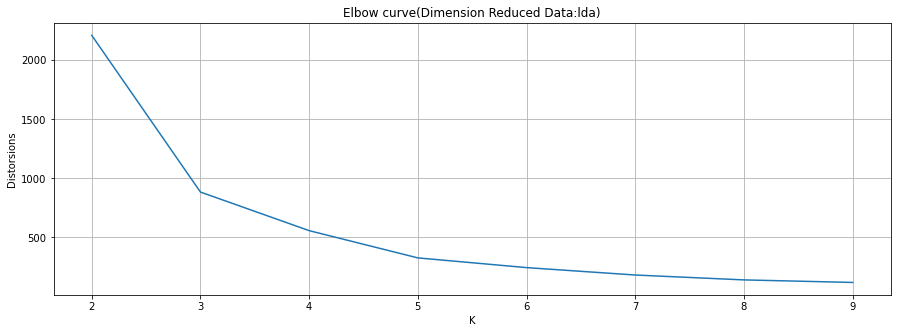

In [54]:
from sklearn.cluster import KMeans
distorsions = []  # WCSS
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_r2)
    distorsions.append(kmeans.inertia_) 

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve(Dimension Reduced Data:lda)');

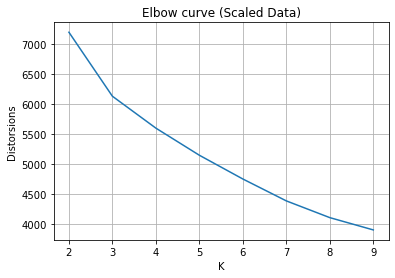

In [55]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    distorsions.append(kmeans.inertia_)

plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve (Scaled Data)');

In [56]:
#for dimension reduced data : PCA
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_r)
    silhoutte = silhouette_score(df_r, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhoutte)

For n_clusters = 2 The average silhouette_score is : 0.5568873329479364
For n_clusters = 3 The average silhouette_score is : 0.44991773394171247
For n_clusters = 4 The average silhouette_score is : 0.4515586450462589
For n_clusters = 5 The average silhouette_score is : 0.40622602496827226
For n_clusters = 6 The average silhouette_score is : 0.3700176349427265
For n_clusters = 7 The average silhouette_score is : 0.35678543040753136


In [57]:
Kmeans_model=KMeans(n_clusters=4)
Kmeans_model.fit(df_r)

KMeans(n_clusters=4)

In [58]:
y_hc= Kmeans_model.fit_predict(df_r)
y_hc

array([1, 3, 0, ..., 3, 3, 2])

In [59]:
#for dimension reduced data : LDA
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_r2)
    silhoutte = silhouette_score(x_r2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhoutte)

For n_clusters = 2 The average silhouette_score is : 0.670058184380791
For n_clusters = 3 The average silhouette_score is : 0.6258262067780997
For n_clusters = 4 The average silhouette_score is : 0.6174890080137857
For n_clusters = 5 The average silhouette_score is : 0.5718220896418374
For n_clusters = 6 The average silhouette_score is : 0.5439077772367513
For n_clusters = 7 The average silhouette_score is : 0.5349117634172247


In [60]:
Kmeans_model2=KMeans(n_clusters=3)
Kmeans_model2.fit(x_r2)

KMeans(n_clusters=3)

In [61]:
y_hc2= Kmeans_model2.fit_predict(x_r2)
y_hc2

array([1, 0, 0, ..., 0, 0, 1])

In [62]:
#for scaled data 
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_df)
    silhoutte = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhoutte)

For n_clusters = 2 The average silhouette_score is : 0.30391609370971484
For n_clusters = 3 The average silhouette_score is : 0.2097885699078078
For n_clusters = 4 The average silhouette_score is : 0.18543501820147074
For n_clusters = 5 The average silhouette_score is : 0.18489642025279096
For n_clusters = 6 The average silhouette_score is : 0.18826873395249397
For n_clusters = 7 The average silhouette_score is : 0.19577355600313


In [116]:
Kmeans_model3=KMeans(n_clusters=3)
Kmeans_model3.fit(scaled_df)
y_hc3= Kmeans_model3.fit_predict(scaled_df)
y_hc3

array([1, 2, 2, ..., 0, 0, 1])

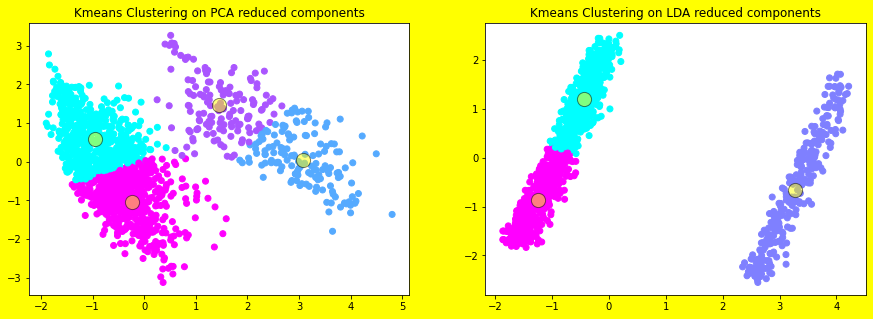

In [64]:
plt.figure(figsize=(15,5),facecolor='yellow')

plt.subplot(121)
yl = Kmeans_model.labels_
plt.scatter(df_r[:,0],df_r[:,1],c=yl,cmap='cool_r')
centers = Kmeans_model.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='yellow',ec='black',s=200,alpha=0.5)
plt.title('Kmeans Clustering on PCA reduced components')

plt.subplot(122)
yl2 = Kmeans_model2.labels_
plt.scatter(x_r2[:,0],x_r2[:,1],c=yl2,cmap='cool_r')
centers = Kmeans_model2.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='yellow',ec='black',s=200,alpha=0.5)
plt.title('Kmeans Clustering on LDA reduced components');

In [65]:
#for scaled data 
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_df)
    silhoutte = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhoutte)

For n_clusters = 2 The average silhouette_score is : 0.30391609370971484
For n_clusters = 3 The average silhouette_score is : 0.2097885699078078
For n_clusters = 4 The average silhouette_score is : 0.18543501820147074
For n_clusters = 5 The average silhouette_score is : 0.18489642025279096
For n_clusters = 6 The average silhouette_score is : 0.18826873395249397
For n_clusters = 7 The average silhouette_score is : 0.19577355600313


# Agglomerative clustering algorithm

In [66]:
df_r_df=pd.DataFrame(df_r)
x_r2_df=pd.DataFrame(x_r2)

In [67]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean distance')

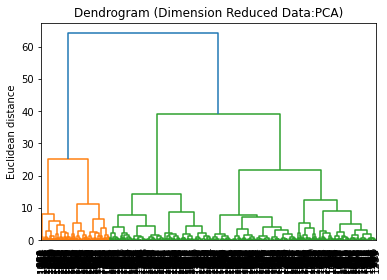

In [68]:
dendrogrm = sch.dendrogram(sch.linkage(df_r_df, method = 'ward'),labels=df_r_df.index)
#plt.axhline(y=10, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram (Dimension Reduced Data:PCA)')
plt.ylabel('Euclidean distance')

In [69]:
from sklearn.cluster import AgglomerativeClustering
#for dimension reduced data :PCA
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_r_df)
y_hc

array([3, 0, 0, ..., 0, 2, 1], dtype=int64)

Text(0, 0.5, 'Euclidean distance')

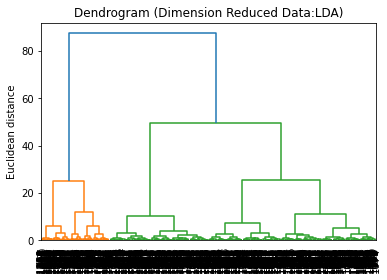

In [70]:
dendrogrm = sch.dendrogram(sch.linkage(x_r2_df, method = 'ward'),labels=x_r2_df.index)
#plt.axhline(y=30, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram (Dimension Reduced Data:LDA)')
plt.ylabel('Euclidean distance')

In [71]:
#for dimension reduced data :LDA
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc2 = hc2.fit_predict(x_r2_df)
y_hc2

array([1, 2, 2, ..., 2, 2, 1], dtype=int64)

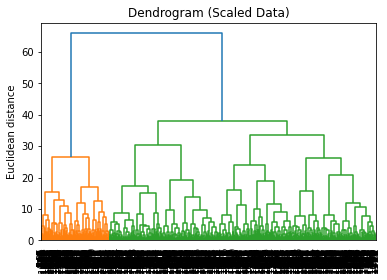

In [72]:
dendrogrm = sch.dendrogram(sch.linkage(scaled_df, method = 'ward'),labels=scaled_df.index)
#plt.axhline(y=11, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram (Scaled Data)')
plt.ylabel('Euclidean distance')
plt.show()

In [73]:
#for scaled data
hc3 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc3 = hc3.fit_predict(scaled_df)
y_hc3

array([1, 0, 3, ..., 0, 0, 1], dtype=int64)

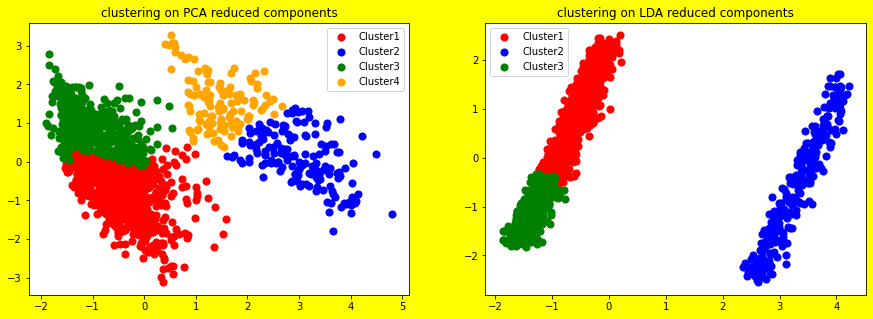

In [74]:
plt.figure(figsize=(15,5),facecolor='yellow')

plt.subplot(121)
plt.scatter(df_r[y_hc== 0, 0], df_r[y_hc== 0, 1], s = 50, c = 'red', label = 'Cluster1')
plt.scatter(df_r[y_hc == 1, 0], df_r[y_hc== 1, 1], s = 50, c = 'blue', label = 'Cluster2')
plt.scatter(df_r[y_hc == 2, 0], df_r[y_hc== 2, 1], s = 50, c = 'green', label = 'Cluster3')
plt.scatter(df_r[y_hc == 3, 0], df_r[y_hc== 3, 1], s = 50, c = 'orange', label = 'Cluster4')
plt.title('clustering on PCA reduced components')
plt.legend()

plt.subplot(122)
plt.scatter(x_r2[y_hc2== 0, 0], x_r2[y_hc2== 0, 1], s = 50, c = 'red', label = 'Cluster1')
plt.scatter(x_r2[y_hc2 == 1, 0], x_r2[y_hc2== 1, 1], s = 50, c = 'blue', label = 'Cluster2')
plt.scatter(x_r2[y_hc2 == 2, 0], x_r2[y_hc2== 2, 1], s = 50, c = 'green', label = 'Cluster3')
plt.title('clustering on LDA reduced components')
plt.legend()
plt.show()

In [75]:
silhoutte = silhouette_score(df_r_df,y_hc)
silhoutte1 = silhouette_score(x_r2_df,y_hc2)
silhoutte2 = silhouette_score(scaled_df,y_hc3)
print('Silhoutte score of PCA Data :',silhoutte)
print('Silhoutte score of LDA Data :',silhoutte1)
print('Silhoutte score of scaled Data :',silhoutte2)

Silhoutte score of PCA Data : 0.4149959439391239
Silhoutte score of LDA Data : 0.5922077282349305
Silhoutte score of scaled Data : 0.15021058006020813


# DBSCAN clustering algorithm

In [105]:
from sklearn.neighbors import NearestNeighbors # pca
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_r)
distances, indices = nbrs.kneighbors(df_r)

Text(0, 0.5, 'Epsilon')

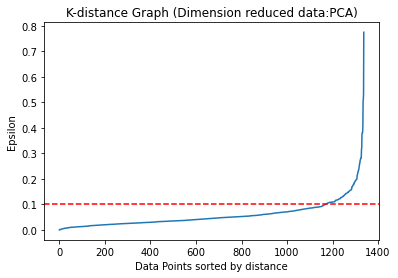

In [106]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(y=0.1, color='r', linestyle='--')
plt.title('K-distance Graph (Dimension reduced data:PCA)')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')


In [107]:
#for dimension reduced data :PCA
from sklearn.cluster import DBSCAN
eps=0.15
for min_samples in [2,4,5,6,10, 11, 12, 13]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(df_r)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', len(results))

eps= 0.15 | min_samples=  2 | obtained clustering:  52
eps= 0.15 | min_samples=  4 | obtained clustering:  26
eps= 0.15 | min_samples=  5 | obtained clustering:  19
eps= 0.15 | min_samples=  6 | obtained clustering:  14
eps= 0.15 | min_samples=  10 | obtained clustering:  3
eps= 0.15 | min_samples=  11 | obtained clustering:  5
eps= 0.15 | min_samples=  12 | obtained clustering:  5
eps= 0.15 | min_samples=  13 | obtained clustering:  7


In [108]:
#for dimension reduced data :PCA
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.15,min_samples=11)
dbscan_opt.fit(df_r)
df_r_df['DBSCAN_opt_labels']=dbscan_opt.labels_
df_r_df['DBSCAN_opt_labels'].value_counts()

 0    784
-1    473
 1     53
 3     20
 2      8
Name: DBSCAN_opt_labels, dtype: int64

In [109]:
neigh2 = NearestNeighbors(n_neighbors=2)# lda
nbrs2 = neigh2.fit(x_r2)
distances2, indices2 = nbrs2.kneighbors(x_r2)

Text(0, 0.5, 'Epsilon')

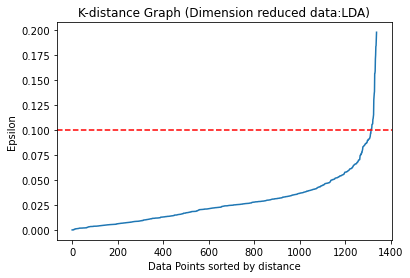

In [110]:
distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:,1]
plt.plot(distances2)
plt.axhline(y=0.1, color='r', linestyle='--')
plt.title('K-distance Graph (Dimension reduced data:LDA)')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')

In [111]:
#for dimension reduced data :LDA
from sklearn.cluster import DBSCAN
eps=0.1
for min_samples in [2,4,5,6,10, 11, 12, 13]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(x_r2)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', len(results))

eps= 0.1 | min_samples=  2 | obtained clustering:  30
eps= 0.1 | min_samples=  4 | obtained clustering:  14
eps= 0.1 | min_samples=  5 | obtained clustering:  12
eps= 0.1 | min_samples=  6 | obtained clustering:  11
eps= 0.1 | min_samples=  10 | obtained clustering:  5
eps= 0.1 | min_samples=  11 | obtained clustering:  4
eps= 0.1 | min_samples=  12 | obtained clustering:  3
eps= 0.1 | min_samples=  13 | obtained clustering:  2


In [112]:
#for dimension reduced data :LDA
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.1,min_samples=11)
dbscan_opt.fit(x_r2_df)
x_r2_df['DBSCAN_opt_labels']=dbscan_opt.labels_
x_r2_df['DBSCAN_opt_labels'].value_counts()

 0    989
-1    320
 1     18
 2     11
Name: DBSCAN_opt_labels, dtype: int64

In [93]:
neigh3 = NearestNeighbors(n_neighbors=2)   #scaled_df
nbrs3 = neigh3.fit(scaled_df)
distances3, indices3 = nbrs3.kneighbors(scaled_df)

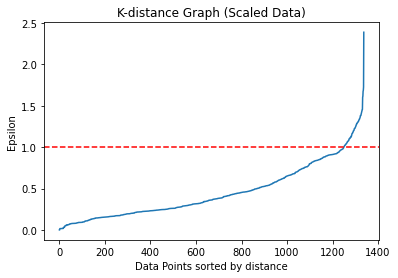

In [94]:
distances3 = np.sort(distances3, axis=0)
distances3 = distances3[:,1]
plt.plot(distances3)
plt.axhline(y=1, color='r', linestyle='--')
plt.title('K-distance Graph (Scaled Data)')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [95]:
#for scaled data
eps=1
for min_samples in [2,4,5,6,10, 11, 12, 13]:
    clusterer2 = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels2 = clusterer2.fit_predict(scaled_df)
    x= cluster_labels2 +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', len(results))

eps= 1 | min_samples=  2 | obtained clustering:  48
eps= 1 | min_samples=  4 | obtained clustering:  16
eps= 1 | min_samples=  5 | obtained clustering:  16
eps= 1 | min_samples=  6 | obtained clustering:  12
eps= 1 | min_samples=  10 | obtained clustering:  3
eps= 1 | min_samples=  11 | obtained clustering:  3
eps= 1 | min_samples=  12 | obtained clustering:  3
eps= 1 | min_samples=  13 | obtained clustering:  3


In [114]:
#for scaled data
dbscan_opt=DBSCAN(eps=1,min_samples=11)
dbscan_opt.fit(scaled_df)
scaled_df['DBSCAN_opt_labels']=dbscan_opt.labels_
scaled_df['DBSCAN_opt_labels'].value_counts()

-1    462
 1    456
 0    420
Name: DBSCAN_opt_labels, dtype: int64

In [115]:
from sklearn import metrics
print("Silhouette Coefficient with dimension reduced data: %0.3f" % metrics.silhouette_score(df_r_df, df_r_df['DBSCAN_opt_labels']))
print("Silhouette Coefficient with dimension reduced data: %0.3f" % metrics.silhouette_score(x_r2_df, x_r2_df['DBSCAN_opt_labels']))
print("Silhouette Coefficient with scaled data: %0.3f" % metrics.silhouette_score(scaled_df, scaled_df['DBSCAN_opt_labels']))

Silhouette Coefficient with dimension reduced data: 0.339
Silhouette Coefficient with dimension reduced data: 0.499
Silhouette Coefficient with scaled data: 0.184


Text(0.5, 1.0, 'clustering on LDA reduced components')

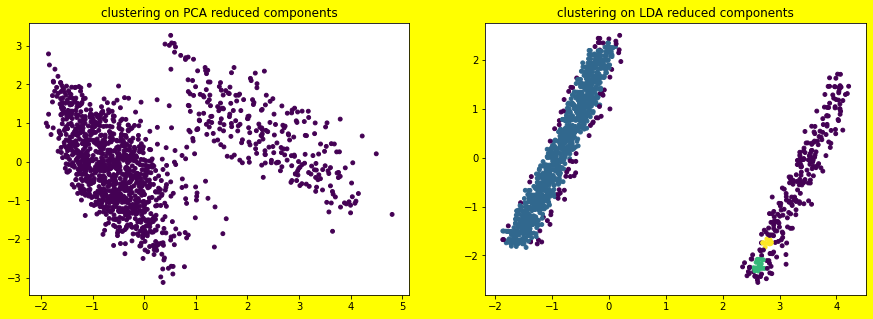

In [101]:
plt.figure(figsize=(15,5),facecolor='yellow')
plt.subplot(121)
plt.scatter(df_r_df[0], df_r_df[1], c=df_r_df['DBSCAN_opt_labels'],s=15)
plt.title('clustering on PCA reduced components')

plt.subplot(122)
plt.scatter(x_r2_df[0], x_r2_df[1], c=x_r2_df['DBSCAN_opt_labels'],s=15)
plt.title('clustering on LDA reduced components')